In [1]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt
import math

## Problem
What is our underflow roundoff error?

In [2]:
# roundoff error
(math.sqrt(2.0))**2 - 2

4.440892098500626e-16

What is our overflow roundoff error?

In [3]:
large = 2.0**1021
for i in range(3):
    large *= 2
    print(i, large)

0 4.49423283715579e+307
1 8.98846567431158e+307
2 inf


In [4]:
# machine precision
small = 1.0 / (2**50)
for i in range(3):
    small /= 2
    print(i, 1+small, small)

0 1.0000000000000004 4.440892098500626e-16
1 1.0000000000000002 2.220446049250313e-16
2 1.0 1.1102230246251565e-16


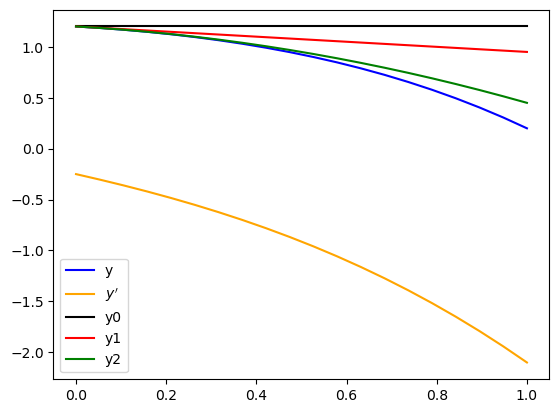

In [17]:
# create a simple plot of a function
x = np.linspace(0, 1, 20)
y = -0.1*(x**4) - 0.15*(x**3) - 0.5*(x**2) - 0.25*x + 1.2
yprime = -0.4*(x**3) - 0.45*(x**2) - x - 0.25
y0 = 1.2 + 0*x
y1 = 1.2 - 0.25*x
y2 = 1.2 - 0.25*x - 0.5*(x**2)
# y3 = 1.2 - 0.25*x - 0.5*x**2 
# y4 = 1.2 - 0.25*x - 0.5*x**2

plt.plot(x,y,color='blue',label='y')
plt.plot(x,yprime,color='orange',label='$y\'$')
plt.plot(x,y0,color='black',label='y0')
plt.plot(x,y1,color='red',label='y1')
plt.plot(x,y2,color='green',label='y2')
plt.legend()
plt.show()

In [33]:
def f(x):
    val = -0.1*(x**4) - 0.15*(x**3) - 0.5*(x**2) - 0.25*x + 1.2
    return val

def fprime(x):
    val = -0.4*(x**3) - 0.45*(x**2) - x - 0.25
    return val

h = 0.01

def forward_diff(f, h, x):
    val = (f(x + h) - f(x))/h
    return val

def backwards_diff(f, h, x):
    val = (f(x) - f(x - h))/h
    return val

def central_diff(f, h, x):
    val = (f(x + h) - f(x - h))/(2*h)
    return val

print(f(0.0))
print(f(0.5))
print(f(1.0))
print(f'Forward Difference:, {forward_diff(f, h, 0.5)}, True derivative:, {fprime(0.5)}, Relative error: {abs((forward_diff(f, h, 0.5) - fprime(0.5))/fprime(0.5))*100}%')
print(f'Backward Difference:, {backwards_diff(f, h, 0.5)}, True derivative:, {fprime(0.5)}, Relative error: {abs((backwards_diff(f, h, 0.5) - fprime(0.5))/fprime(0.5))*100}%')
print(f'Central Difference:, {central_diff(f, h, 0.5)}, True derivative:, {fprime(0.5)}, Relative error: {abs((central_diff(f, h, 0.5) - fprime(0.5))/fprime(0.5))*100}%')

1.2
0.9249999999999999
0.19999999999999996
Forward Difference:, -0.9212850999999911, True derivative:, -0.9125, Relative error: 0.9627506849305325%
Backward Difference:, -0.9037849000000042, True derivative:, -0.9125, Relative error: 0.9550794520543295%
Central Difference:, -0.9125349999999977, True derivative:, -0.9125, Relative error: 0.0038356164381014553%
